### Problem Statement
# Introduction


Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

  

# Business Understanding
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

 

The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

 

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

Figure 1. Loan Data Set
Figure 1. Loan Data Set
When a person applies for a loan, there are two types of decisions that could be taken by the company:

Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)
 

# Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).

In [75]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt 
pd.set_option('display.min_rows',500)
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

In [18]:
df = pd.read_csv('loan.csv')
df.head()

/var/folders/2t/sshqnkqd1px61lvcmjqs75x80000gn/T/ipykernel_74445/3318210521.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [26]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [27]:
missing_values = np.round(df.isna().sum()/len(df)*100,2)
missing_values.sort_values(ascending=False)

verification_status_joint         100.00
annual_inc_joint                  100.00
mo_sin_old_rev_tl_op              100.00
mo_sin_old_il_acct                100.00
bc_util                           100.00
bc_open_to_buy                    100.00
avg_cur_bal                       100.00
acc_open_past_24mths              100.00
inq_last_12m                      100.00
total_cu_tl                       100.00
inq_fi                            100.00
total_rev_hi_lim                  100.00
all_util                          100.00
max_bal_bc                        100.00
open_rv_24m                       100.00
open_rv_12m                       100.00
il_util                           100.00
total_bal_il                      100.00
mths_since_rcnt_il                100.00
open_il_24m                       100.00
open_il_12m                       100.00
open_il_6m                        100.00
open_acc_6m                       100.00
tot_cur_bal                       100.00
tot_coll_amt    

In [28]:
empty_cols=df.isnull().sum()
empty_cols

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [29]:
empty_cols=empty_cols[empty_cols>(0.3*len(empty_cols))]
len(empty_cols)

66

In [30]:
empty_cols = list(empty_cols[empty_cols.values > 0.3].index)
df.drop(labels=empty_cols,axis=1, inplace=True)

In [31]:
np.round(df.isna().sum()/len(df)*100,2)

id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
pymnt_plan                 0.00
url                        0.00
purpose                    0.00
title                      0.03
zip_code                   0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
total_acc                  0.00
initial_list_status        0.00
out_prncp                  0.00
out_prnc

In [32]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code',
       'application_type', 'acc_now_delinq', 'delinq_amnt'],
      dtype='object')

# Finding single valued columns

In [35]:
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
constant_columns

['pymnt_plan',
 'initial_list_status',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'delinq_amnt']

In [36]:
df = df.drop(columns=constant_columns)

In [45]:
print("Now we have", len(df.columns), "columns")

Now we have 39 columns


In [46]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_credit_pull_d'],
      dtype='object')

# Dropping columns which is not useful for anlysis
id	- A unique LC assigned ID for the loan listing.
member_id - A unique LC assigned Id for the borrower member.
funded_amnt	- The total amount committed to that loan at that point in time.
url - URL for the LC page with listing data.
out_prncp - Remaining outstanding principal for total amount funded
title - The loan title provided by the borrower
addr_state - The state provided by the borrower in the loan application
out_prncp_inv - Remaining outstanding principal for portion of total amount funded by investors
delinq_2yrs - The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
revol_bal - Total credit revolving balance
total_rec_prncp - Principal received to date
recoveries - post charge off gross recovery
total_pymnt - Payments received to date for total amount funded
total_pymnt_inv - Payments received to date for portion of total amount funded by investors
total_rec_int -	Interest received to date
total_rec_late_fee - Late fees received to date
collection_recovery_fee - 	post charge off collection fee
last_pymnt_amnt	- Last total payment amount received
last_credit_pull_d - The most recent month LC pulled credit for this loan
zip_code - The first 3 numbers of the zip code provided by the borrower in the loan application.


In [50]:
delete_cols = ['id', 'member_id', 'funded_amnt', 'url', 'out_prncp', 'title', 'addr_state', 
 'out_prncp_inv', 'delinq_2yrs', 'revol_bal', 'total_rec_prncp', 'recoveries', 
 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 
 'collection_recovery_fee', 'last_pymnt_amnt', 'last_credit_pull_d', 'zip_code']
df = df.drop(columns=delete_cols)

In [51]:
print("Now we have", len(df.columns), "columns")

Now we have 19 columns


In [52]:
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,total_acc
0,5000,4975.0,36 months,10.65%,162.87,B,B2,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,9
1,2500,2500.0,60 months,15.27%,59.83,C,C4,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,4
2,2400,2400.0,36 months,15.96%,84.33,C,C5,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,10
3,10000,10000.0,36 months,13.49%,339.31,C,C1,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,37
4,3000,3000.0,60 months,12.69%,67.79,B,B5,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,Jan-96,0,15,0,38


# Standardize the columns values

In [56]:
df['home_ownership'].value_counts()

home_ownership
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: count, dtype: int64

# Standardize the home_ownership column 
changing NONE to OTHER

In [57]:
df['home_ownership'] = df['home_ownership'].replace(to_replace = ['NONE'],value='OTHER')
df['home_ownership'].value_counts()

home_ownership
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER         101
Name: count, dtype: int64

In [60]:
df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

# Remove the loan_status wit current status rows 

In [61]:
df = df[df.loan_status != "Current"]
df.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

# change the type of int_rate column and remove % symbol

In [62]:
df.int_rate = pd.to_numeric(df.int_rate.apply(lambda x : x.split('%')[0]))

/var/folders/2t/sshqnkqd1px61lvcmjqs75x80000gn/T/ipykernel_74445/4066886773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.int_rate = pd.to_numeric(df.int_rate.apply(lambda x : x.split('%')[0]))


# Update the Months column data type


In [64]:

df.term=df.term.apply(lambda x: int(x.replace(' months',''))).astype(int)

/var/folders/2t/sshqnkqd1px61lvcmjqs75x80000gn/T/ipykernel_74445/3829894568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.term=df.term.apply(lambda x: int(x.replace(' months',''))).astype(int)


# Update the Date fields

In [65]:

df['issue_year']=pd.to_datetime(df.issue_d,format='%b-%y').dt.year
df['issue_month']=pd.to_datetime(df.issue_d,format='%b-%y').dt.month

/var/folders/2t/sshqnkqd1px61lvcmjqs75x80000gn/T/ipykernel_74445/376516151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['issue_year']=pd.to_datetime(df.issue_d,format='%b-%y').dt.year
/var/folders/2t/sshqnkqd1px61lvcmjqs75x80000gn/T/ipykernel_74445/376516151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['issue_month']=pd.to_datetime(df.issue_d,format='%b-%y').dt.month


In [66]:
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,total_acc,issue_year,issue_month
0,5000,4975.0,36,10.65,162.87,B,B2,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,9,2011,12
1,2500,2500.0,60,15.27,59.83,C,C4,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,4,2011,12
2,2400,2400.0,36,15.96,84.33,C,C5,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,10,2011,12
3,10000,10000.0,36,13.49,339.31,C,C1,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,37,2011,12
5,5000,5000.0,36,7.90,156.46,A,A4,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,12,2011,12


# Handling outliers

In [67]:
df['int_rate'].value_counts()

int_rate
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
7.49     651
9.99     590
7.90     574
5.42     573
11.71    559
11.99    483
10.37    467
12.69    451
6.03     447
8.49     434
5.79     410
12.99    409
12.42    403
10.65    403
7.29     397
6.62     396
11.86    391
8.90     386
9.63     378
10.59    358
9.91     357
5.99     347
14.27    344
7.14     341
6.99     336
11.11    331
12.53    327
10.74    311
6.54     305
6.91     303
8.94     294
16.77    294
7.66     292
13.61    291
13.98    284
13.23    263
11.12    259
15.99    259
6.17     252
12.68    251
10.75    250
10.36    250
10.00    249
11.36    247
13.99    241
11.83    233
10.62    228
10.38    219
13.06    219
10.25    218
16.49    218
14.96    214
15.65    208
18.25    207
11.14    206
6.92     204
12.18    203
15.23    200
15.95    199
14.65    198
16.32    198
8.00     191
15.21    187
12.73    187
9.62     186
15.27    185
15.58    185
9.32     184
11.48    183
16.89    182
9.88     181
8.5

In [70]:

Q1 = df['int_rate'].quantile(0.25)
Q3 = df['int_rate'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['int_rate'] >= lower_bound) & (df['int_rate'] <= upper_bound)]

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38512 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38512 non-null  int64  
 1   funded_amnt_inv      38512 non-null  float64
 2   term                 38512 non-null  int64  
 3   int_rate             38512 non-null  float64
 4   installment          38512 non-null  float64
 5   grade                38512 non-null  object 
 6   sub_grade            38512 non-null  object 
 7   home_ownership       38512 non-null  object 
 8   annual_inc           38512 non-null  float64
 9   verification_status  38512 non-null  object 
 10  issue_d              38512 non-null  object 
 11  loan_status          38512 non-null  object 
 12  purpose              38512 non-null  object 
 13  dti                  38512 non-null  float64
 14  earliest_cr_line     38512 non-null  object 
 15  inq_last_6mths       38512 non-null  int6

In [72]:

Q1 = df['annual_inc'].quantile(0.25)
Q3 = df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['annual_inc'] >= lower_bound) & (df['annual_inc'] <= upper_bound)]

In [73]:
df['annual_inc'].value_counts()

annual_inc
60000.00     1462
50000.00     1029
40000.00      853
45000.00      811
30000.00      808
75000.00      785
65000.00      778
70000.00      714
48000.00      696
80000.00      634
55000.00      631
36000.00      614
42000.00      590
90000.00      548
35000.00      508
100000.00     496
120000.00     480
85000.00      470
72000.00      469
24000.00      401
52000.00      381
54000.00      359
110000.00     306
95000.00      271
62000.00      262
25000.00      247
78000.00      241
38000.00      237
32000.00      216
58000.00      210
130000.00     209
56000.00      202
96000.00      202
125000.00     200
43000.00      200
66000.00      198
105000.00     194
68000.00      192
53000.00      188
63000.00      186
51000.00      181
57000.00      181
33000.00      180
84000.00      178
37000.00      172
47000.00      160
140000.00     160
44000.00      159
38400.00      153
46000.00      149
115000.00     146
39000.00      144
82000.00      142
18000.00      137
34000.00      134

In [74]:
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,total_acc,issue_year,issue_month
0,5000,4975.0,36,10.65,162.87,B,B2,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,9,2011,12
1,2500,2500.0,60,15.27,59.83,C,C4,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,4,2011,12
2,2400,2400.0,36,15.96,84.33,C,C5,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,10,2011,12
3,10000,10000.0,36,13.49,339.31,C,C1,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,37,2011,12
5,5000,5000.0,36,7.90,156.46,A,A4,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,12,2011,12


# Univariant Analysis
Based on loan_status, term, annual_inc and int_rate columns


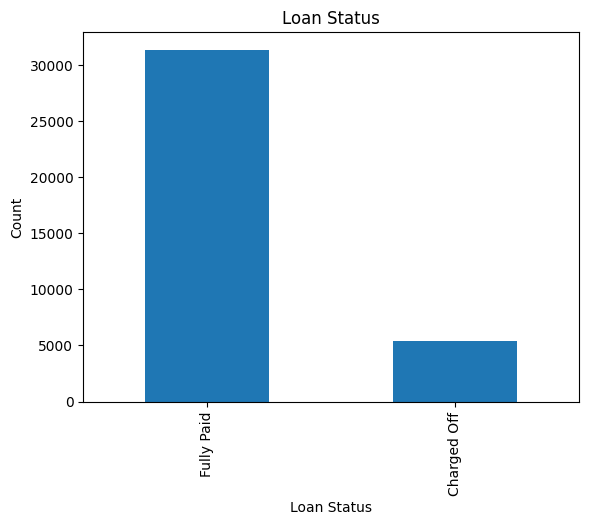

In [79]:

df['loan_status'].value_counts().plot(kind='bar')
plt.title('Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

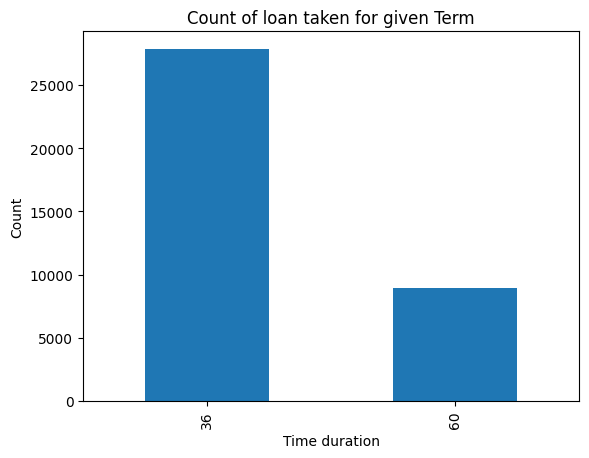

In [80]:

df['term'].value_counts().plot(kind='bar')
plt.title('Count of loan taken for given Term')
plt.xlabel('Time duration')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='annual_inc'>

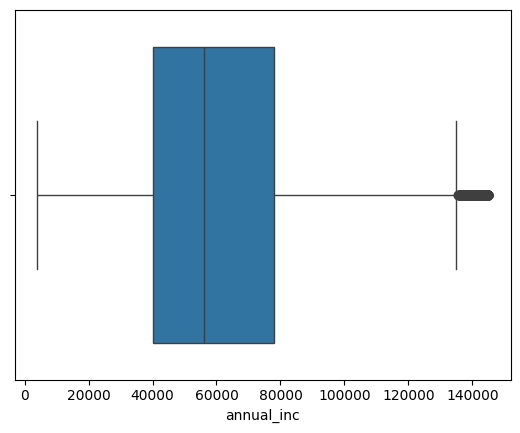

In [82]:
sns.boxplot(x=df['annual_inc'])


count    36758.000000
mean        11.872310
std          3.644246
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         22.480000
Name: int_rate, dtype: float64

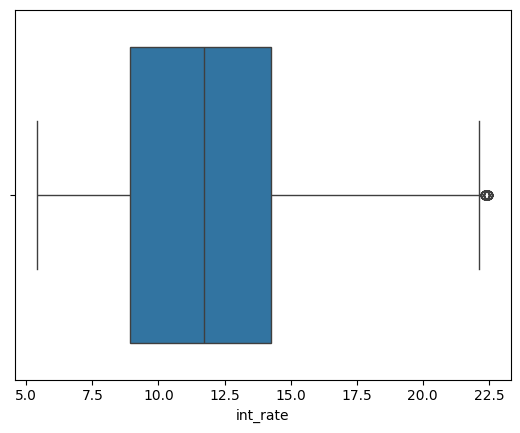

In [84]:
sns.boxplot(x=df['int_rate'])
df['int_rate'].describe()

<Axes: xlabel='issue_year'>

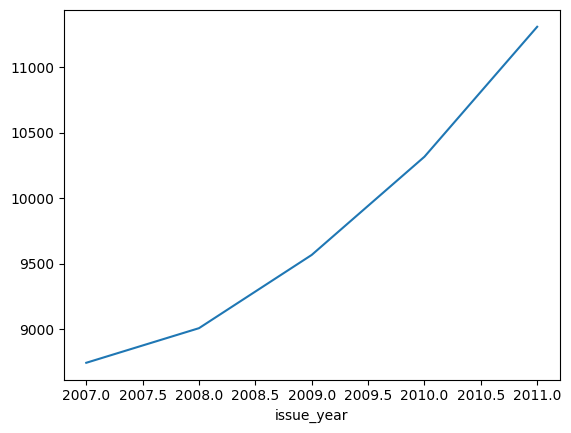

In [111]:
df.groupby('issue_year')['loan_amnt'].mean().plot(kind='line')


# Findings Based on Univariant Analysis
- Number of loans with Defaulted state is less in number compared to fully paid.
- Number of Loans taken for 60 months is less compared to 36 months duration.
- People with the annual income between 40000 to 80000 tends to take more loans.
- Loans with the interest rates between 8.94% to 14.27% are more attractive to people.
- The overall Loan Amount given to the customers increases every year.

# Bivariant Analysis
Based on loan_status, term, annual_inc and int_rate columns


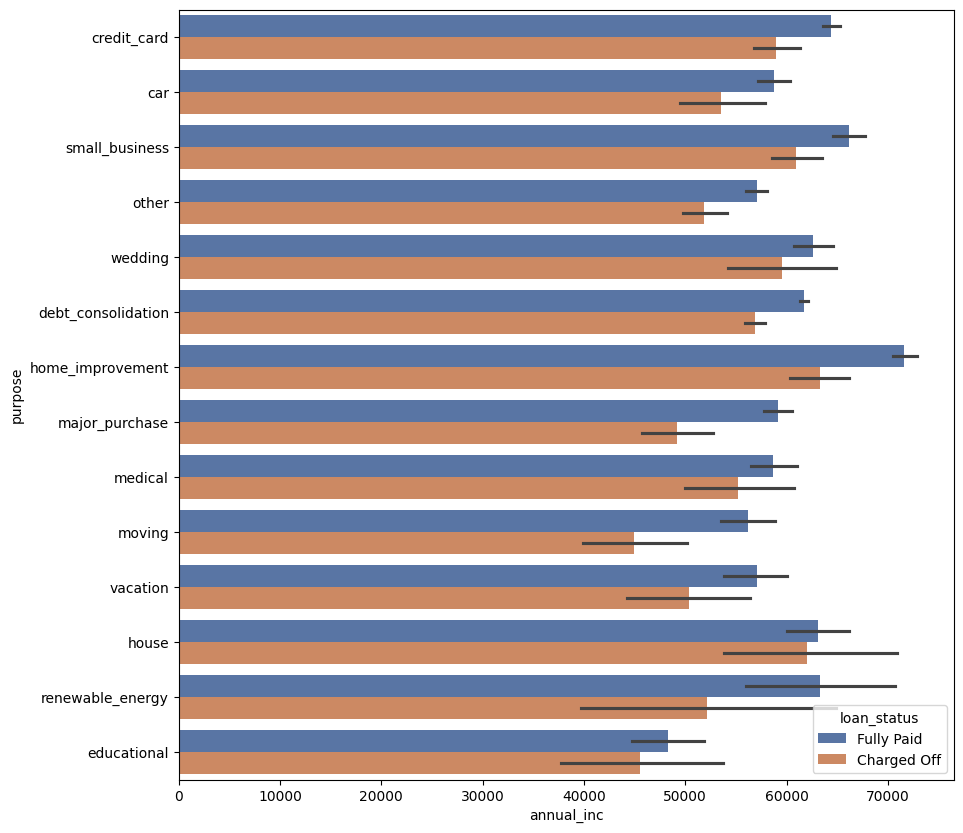

In [94]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

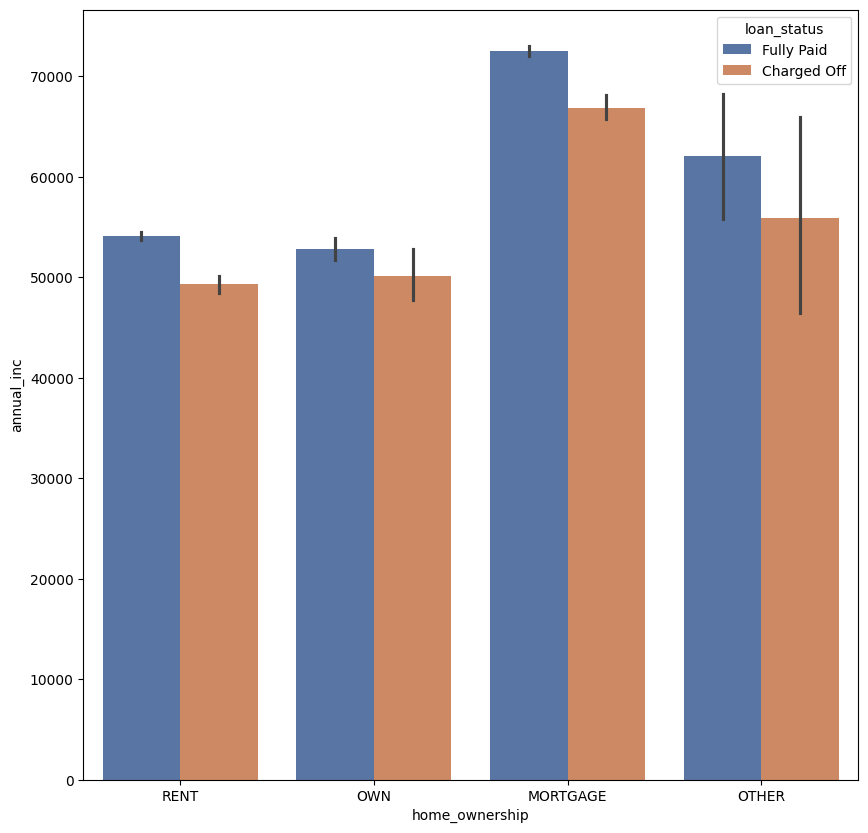

In [100]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='home_ownership', y='annual_inc', hue ='loan_status',palette="deep")
plt.show()

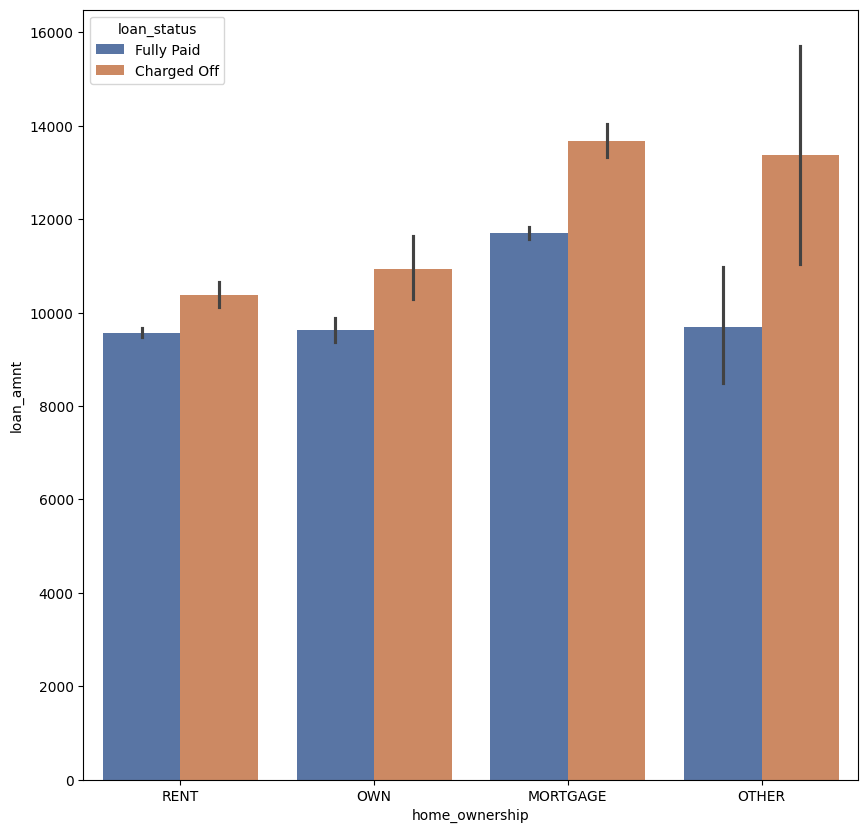

In [102]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='home_ownership', y='loan_amnt', hue ='loan_status',palette="deep")
plt.show()

<Axes: xlabel='grade', ylabel='int_rate'>

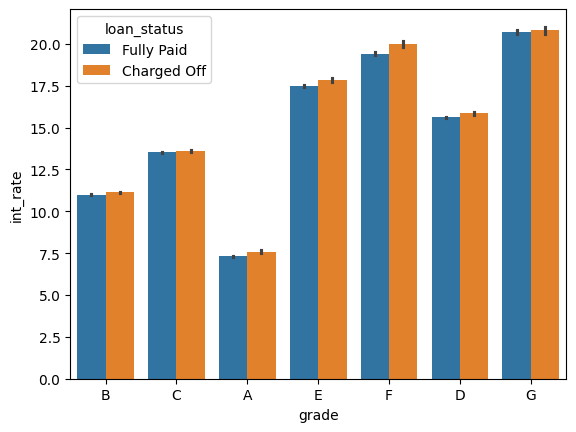

In [107]:
sns(x='grade', y='int_rate', data=df)


<Axes: xlabel='loan_status'>

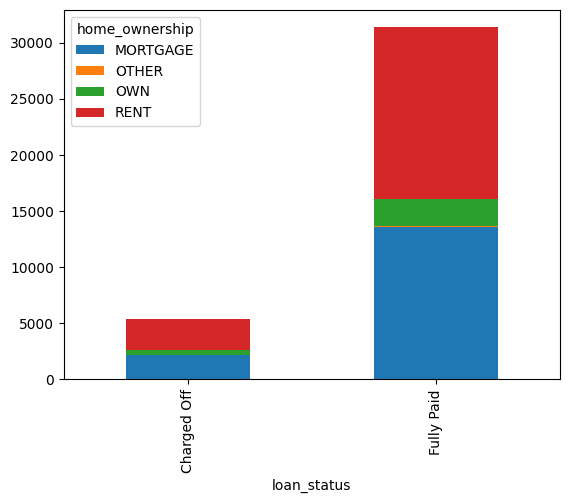

In [112]:
pd.crosstab(df['loan_status'], df['home_ownership']).plot(kind='bar', stacked=True)


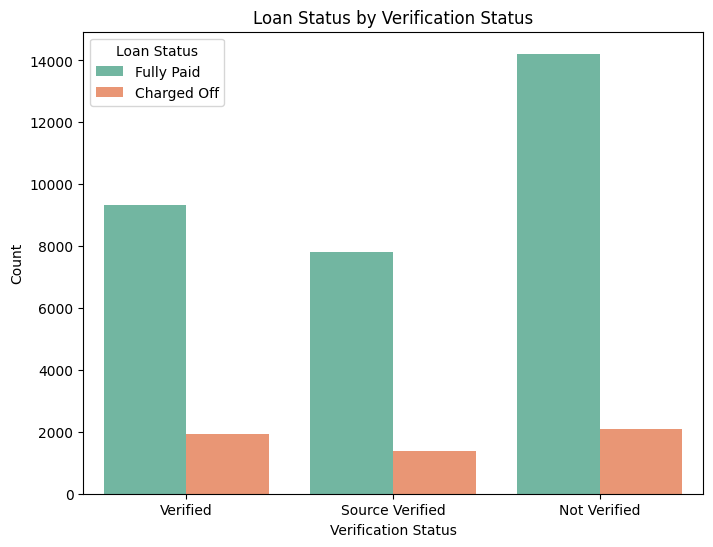

In [113]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='verification_status', hue='loan_status', palette='Set2')
plt.title('Loan Status by Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

# Findings Based on Bivariant Analysis

- Number of Loan taken for home improvement is higher in correlation with the annual income.
- Loan Takers with home ownership Mortgage and higher salary  is less like to repay the Loans.
- Loan Takers with home ownership Mortgage, taking the loan above 14k less like to repay the Loans.
- Loan Takers of Grades F and G taking the loan at higher interest rates are more number in defaulted.
- Loan Takers who rent or have a mortgage  are more likely to be defaulted.
- Loans with verified members are also more likely to get defaulted as it is in Not Verified. This might be because of not having a solid verification process.
